In [198]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from ggplot import *
import seaborn as sns

### import and check for null values

In [103]:
df=pd.read_csv("land_train.csv")
df.isnull().sum().sum()

0

In [122]:
df.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6,target
0,323,229,120,517,209,115,0.623234,-1.047476,1.473405,0.380537,-0.021277,0.424242,1
1,335,220,109,387,149,89,0.560484,-1.004514,1.200777,0.324813,-0.101010,0.444030,1
2,255,150,52,184,72,45,0.559322,-0.996822,0.825000,0.300728,-0.072165,0.437500,1
3,254,182,73,413,156,84,0.699588,-1.151258,1.425354,0.436268,0.070064,0.451670,1
4,257,219,100,722,254,130,0.756691,-1.236199,1.990973,0.506155,0.130435,0.479508,1


In [125]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'I1', 'I2', 'I3', 'I4', 'I5', 'I6',
       'target'],
      dtype='object')

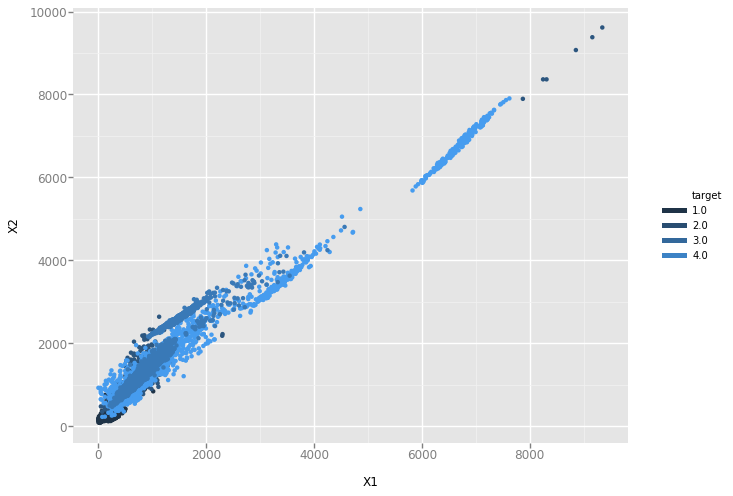

<ggplot: (140496350584)>


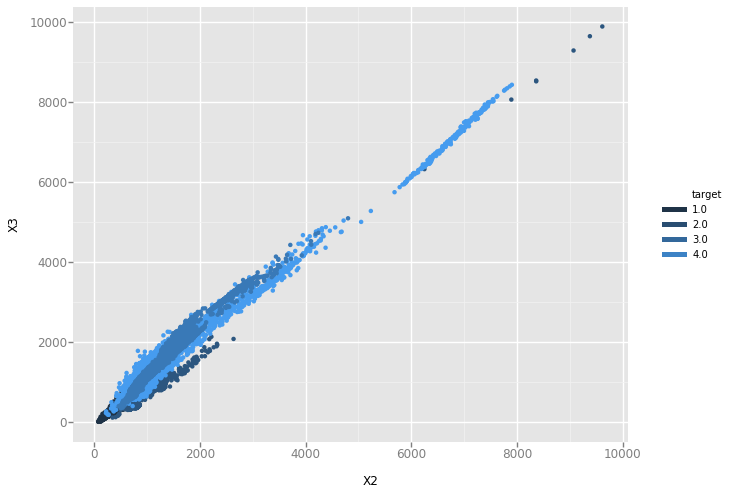

<ggplot: (140496627453)>


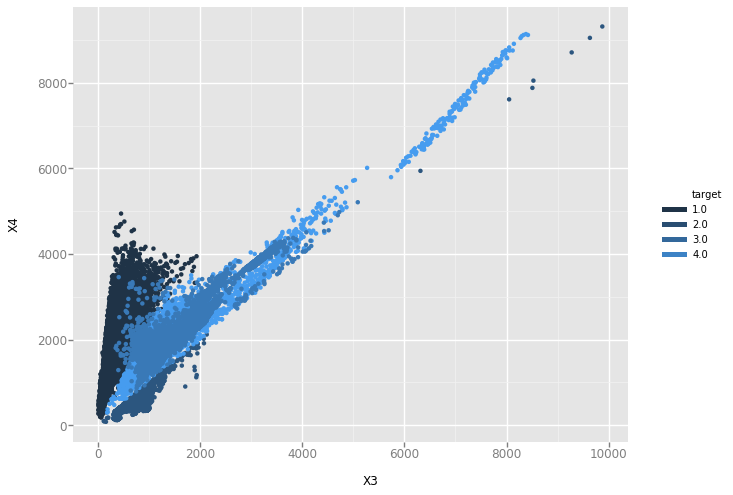

<ggplot: (140496654007)>


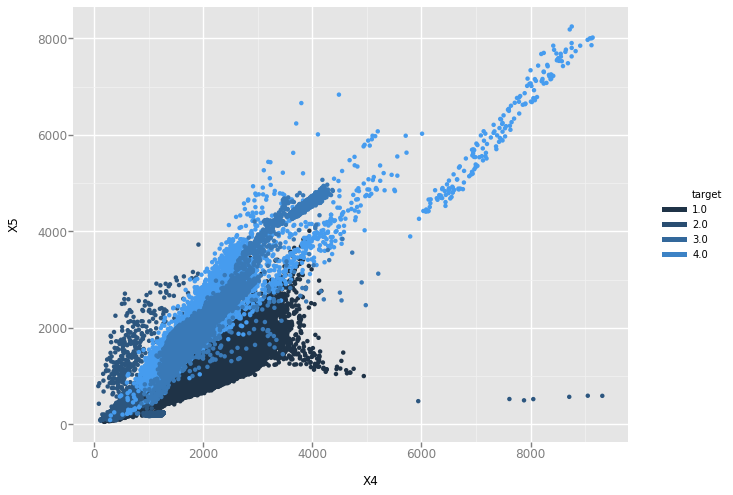

<ggplot: (140496707062)>


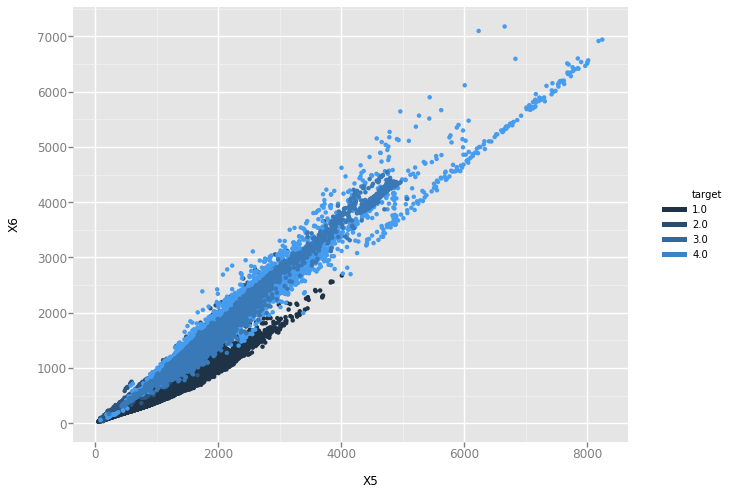

<ggplot: (140496725487)>


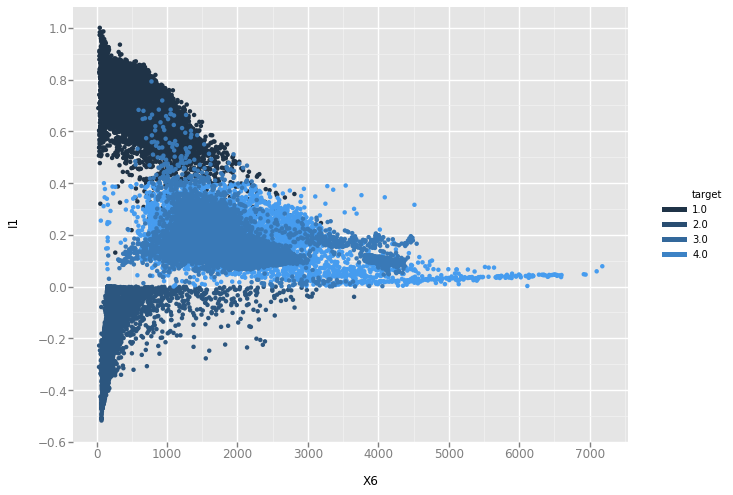

<ggplot: (140496761713)>


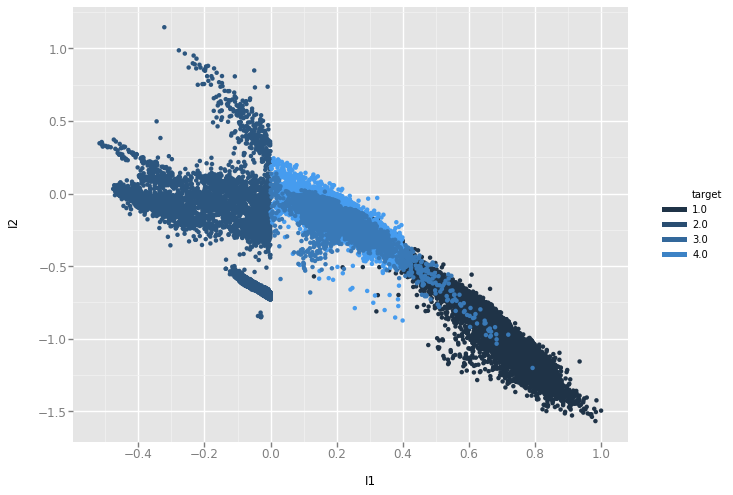

<ggplot: (-9223371896357987419)>


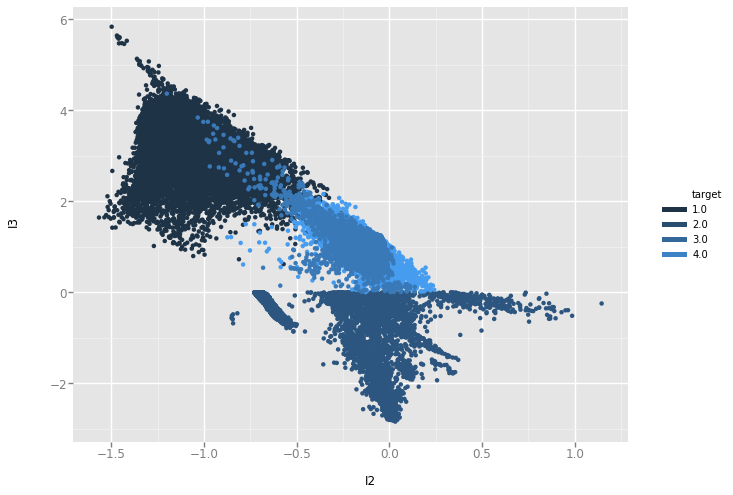

<ggplot: (140510039791)>


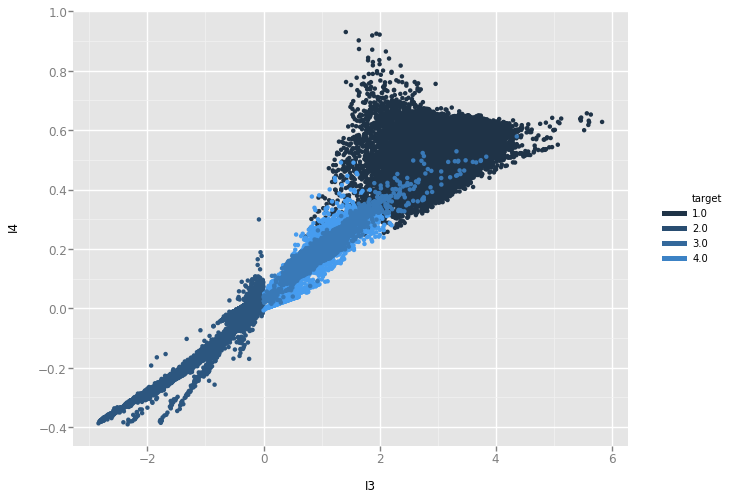

<ggplot: (140496727749)>


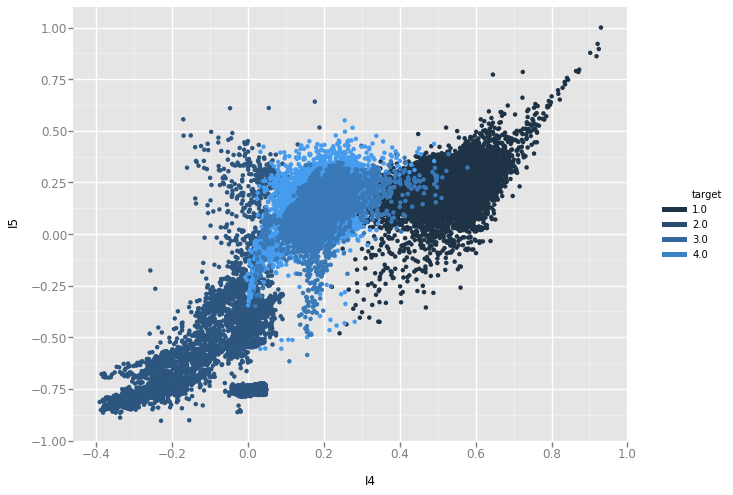

<ggplot: (-9223371896358546821)>


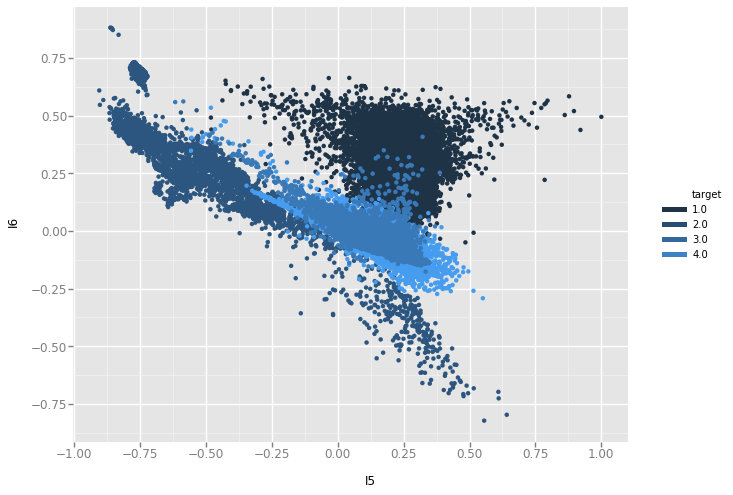

<ggplot: (140496730446)>


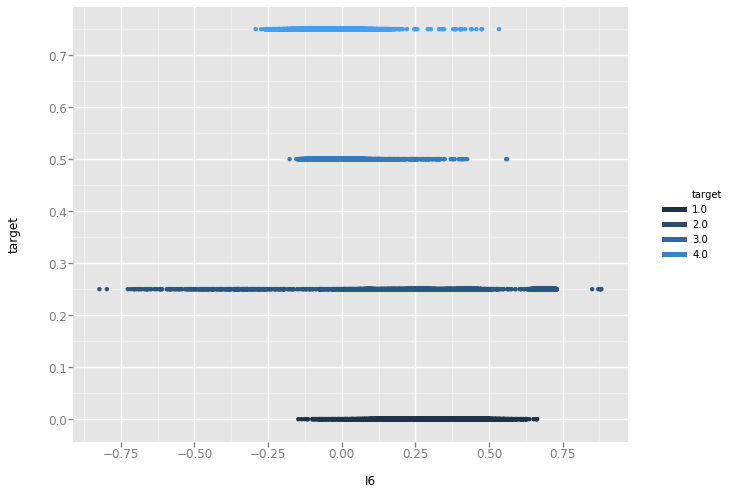

<ggplot: (-9223371896357959087)>


In [197]:
for i in range(len(df.columns)-1):
    a=ggplot(df, aes(x=df.columns[i], y=df.columns[i+1], color='target')) + geom_point() + scale_color_brewer()
    print(a)
    grid

###### The Scatter plots as we've seen of each variables with respect to other, Some have strong positive correlation and some have strong ans well as moderate negative Correlation. The classes are overlapping,  Hence we shall use some function that transform whole data to another dimension so that it can be classified there correctly. Hence, we shall make use of MLP. 

### just a raw run with MLPC

In [24]:
x_train, x_test, y_train, y_test=train_test_split(df.iloc[:,0:12], df.iloc[:, 12:13])

In [26]:
y_train.target.unique()

array([3, 1, 2, 4], dtype=int64)

In [27]:
clf=MLPClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
accuracy_score(y_test, y_pred)

0.926509090909091

## MLP simple run with default hyper parameters gives 0.926 accuracy

In [30]:
clf.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_iter', 'momentum', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [41]:
parameters={"activation" : ['identity', 'logistic', 'tanh', 'relu'], 'solver' : ['lbfgs', 'sgd', 'adam'], "alpha":[0.0001, 0.005, 0.001], "early_stopping":[True]}
grid = GridSearchCV(clf, parameters, cv=3, verbose=2)
grid.fit(x_train, y_train)
y_pred_grid=grid.predict(x_test)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=lbfgs, total=  55.9s
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.0s remaining:    0.0s
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=lbfgs, total=  12.2s
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=lbfgs, total=  33.2s
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=sgd, total=   1.1s
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=sgd, total=   1.1s
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=sgd, total=   1.2s
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=adam, total=   1.9s
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=adam, total=   3.6s
[CV] activation=identity, alpha=0.0001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.0001, early_stopping=True, solver=adam, total=   1.6s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=lbfgs, total=  11.0s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=lbfgs, total=  22.4s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=lbfgs, total=  10.7s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=sgd, total=   0.9s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=sgd, total=   0.9s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=sgd, total=   1.1s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=adam, total=   2.3s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=adam, total=   1.7s
[CV] activation=identity, alpha=0.005, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.005, early_stopping=True, solver=adam, total=   3.5s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=lbfgs, total=  12.0s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=lbfgs, total=   5.0s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=lbfgs, total=  10.6s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=sgd, total=   1.1s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=sgd, total=   0.9s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=sgd, total=   0.9s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=adam, total=   2.4s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=adam, total=   2.5s
[CV] activation=identity, alpha=0.001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=identity, alpha=0.001, early_stopping=True, solver=adam, total=   1.3s
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=lbfgs, total= 1.7min
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=lbfgs, total= 1.7min
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=lbfgs, total= 1.7min
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=sgd, total=   3.9s
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=sgd, total=   3.3s
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=sgd, total=   3.6s
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=adam, total=   4.1s
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=adam, total=   4.1s
[CV] activation=logistic, alpha=0.0001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.0001, early_stopping=True, solver=adam, total=   2.3s
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=lbfgs, total= 1.7min
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=lbfgs, total= 1.7min
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=lbfgs, total= 1.8min
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=sgd, total=   3.6s
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=sgd, total=   5.3s
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=sgd, total=   6.3s
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=adam, total=   4.1s
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=adam, total=   3.0s
[CV] activation=logistic, alpha=0.005, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.005, early_stopping=True, solver=adam, total=   4.4s
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=lbfgs, total= 1.7min
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=lbfgs, total= 1.8min
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=lbfgs, total= 1.6min
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=sgd, total=   2.9s
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=sgd, total=   3.2s
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=sgd 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=sgd, total=   4.6s
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=adam, total=   5.9s
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=adam, total=   5.5s
[CV] activation=logistic, alpha=0.001, early_stopping=True, solver=adam 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=logistic, alpha=0.001, early_stopping=True, solver=adam, total=   3.7s
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=sgd ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=sgd, total=   3.2s
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=sgd ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=sgd, total=   5.4s
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=sgd ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=sgd, total=   3.5s
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=adam .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=adam, total=   3.0s
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=adam .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=adam, total=   2.1s
[CV] activation=tanh, alpha=0.0001, early_stopping=True, solver=adam .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.0001, early_stopping=True, solver=adam, total=   1.8s
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=sgd, total=   2.0s
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=sgd, total=   2.6s
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=sgd, total=   3.9s
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=adam, total=   3.2s
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=adam, total=   2.5s
[CV] activation=tanh, alpha=0.005, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.005, early_stopping=True, solver=adam, total=   1.5s
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=lbfgs, total= 1.3min
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=sgd, total=   1.3s
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=sgd, total=   1.3s
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=sgd, total=   2.6s
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=adam, total=   4.2s
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=adam, total=   3.2s
[CV] activation=tanh, alpha=0.001, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=tanh, alpha=0.001, early_stopping=True, solver=adam, total=   2.1s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=lbfgs, total=   6.3s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=lbfgs, total=  28.8s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=lbfgs 


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=lbfgs, total=  14.1s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=sgd ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=sgd, total=   2.0s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=sgd ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=sgd, total=   2.5s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=sgd ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=sgd, total=   1.8s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=adam .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=adam, total=   3.8s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=adam .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=adam, total=   2.9s
[CV] activation=relu, alpha=0.0001, early_stopping=True, solver=adam .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.0001, early_stopping=True, solver=adam, total=   2.4s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=lbfgs, total=  14.6s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=lbfgs, total=  17.2s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=lbfgs, total=  13.5s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=sgd, total=   1.0s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=sgd, total=   3.7s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=sgd, total=   2.2s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=adam, total=   2.0s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=adam, total=   2.0s
[CV] activation=relu, alpha=0.005, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.005, early_stopping=True, solver=adam, total=   4.6s
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=lbfgs, total=  14.5s
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=lbfgs, total= 1.2min
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=lbfgs .


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=lbfgs, total=  36.0s
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=sgd, total=   1.7s
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=sgd, total=   3.9s
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=sgd ...


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=sgd, total=   3.2s
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=adam, total=   4.3s
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=adam, total=   2.3s
[CV] activation=relu, alpha=0.001, early_stopping=True, solver=adam ..


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  activation=relu, alpha=0.001, early_stopping=True, solver=adam, total=   3.7s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 37.7min finished
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.926509090909091

In [42]:
classification_report(y_test, y_pred_grid)

'             precision    recall  f1-score   support\n\n          1       1.00      1.00      1.00     12532\n          2       1.00      1.00      1.00      7531\n          3       0.83      0.92      0.87      4981\n          4       0.81      0.61      0.69      2456\n\navg / total       0.95      0.95      0.95     27500\n'

In [43]:
accuracy_score(y_pred_grid, y_test)

0.9498181818181818

In [45]:
grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__activation', 'estimator__alpha', 'estimator__batch_size', 'estimator__beta_1', 'estimator__beta_2', 'estimator__early_stopping', 'estimator__epsilon', 'estimator__hidden_layer_sizes', 'estimator__learning_rate', 'estimator__learning_rate_init', 'estimator__max_iter', 'estimator__momentum', 'estimator__nesterovs_momentum', 'estimator__power_t', 'estimator__random_state', 'estimator__shuffle', 'estimator__solver', 'estimator__tol', 'estimator__validation_fraction', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [50]:
grid.best_params_

{'activation': 'relu',
 'alpha': 0.001,
 'early_stopping': True,
 'solver': 'adam'}

#### hence above params for MLP gave almost 0.95 accuracy

### apply PCA on it

In [442]:
scal=StandardScaler()
scal_dt=scal.fit_transform(df)
scal_dt=pd.DataFrame(scal_dt)
scal_dt.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.426807,-1.037400,-1.037004,-1.781833,-1.000218,-0.783469,0.617039,-0.707538,-0.086081,0.287801,0.060487,0.356266,-0.912871
1,-0.398792,-1.054398,-1.053314,-1.969266,-1.069275,-0.816089,0.455135,-0.616708,-0.251028,0.075812,-0.128626,0.430073,-0.912871
2,-0.585557,-1.186601,-1.137832,-2.261950,-1.157899,-0.871292,0.452137,-0.600446,-0.478383,-0.015812,-0.060210,0.405717,-0.912871
3,-0.587892,-1.126165,-1.106694,-1.931779,-1.061219,-0.822362,0.814045,-0.926952,-0.115153,0.499816,0.277128,0.458569,-0.912871
4,-0.580888,-1.056287,-1.066659,-1.486265,-0.948424,-0.764650,0.961378,-1.106533,0.227061,0.765681,0.420317,0.562407,-0.912871


#### Getting Eigen values and Eigen vectors to determine the n_component value

In [443]:
all_dat=df.iloc[:, 0:12]
all_dat_T=df.iloc[:, 0:12].T
cova=np.cov(all_dat_T)
eig_val, eig_vec=np.linalg.eig(cova)

#### so, N components= no.of eigen values>1. The graph is plotted that interprets the same

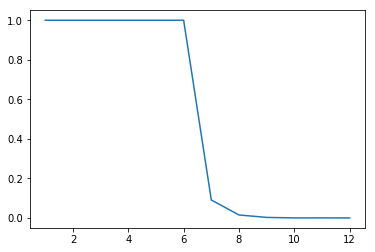

In [444]:
x_axis=[]
y_axis=[]
count=1
for i in eig_val:
    xx=i
    if(xx>1):
        xx=1
    x_axis.append(count)
    y_axis.append(xx)
    count+=1
plt.plot(x_axis, y_axis)
plt.show()

## based on elbow point, we select 7 as n components

In [445]:
pca=PCA(n_components=7)

In [446]:
df_x=pca.fit_transform(scal_dt.iloc[:, 0:12])

In [447]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca=train_test_split(df_x, df.iloc[:, 12:13])

#### applying the best estimator out of grid search

In [448]:
clf_best=grid.best_estimator_
clf_best.fit(x_train_pca, y_train_pca)
y_pred_pca=clf_best.predict(x_test_pca)
accuracy_score(y_pred_pca, y_test_pca)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9780363636363636

In [450]:
classification_report(y_test_pca, y_pred_pca)

'             precision    recall  f1-score   support\n\n          1       1.00      1.00      1.00     12461\n          2       1.00      1.00      1.00      7510\n          3       0.93      0.96      0.94      5015\n          4       0.91      0.86      0.89      2514\n\navg / total       0.98      0.98      0.98     27500\n'

#### applying the best estimator without early stopping

In [451]:
clf_neural=MLPClassifier(activation='relu', alpha= 0.001, early_stopping= False, solver= 'adam')
clf_neural.fit(x_train_pca, y_train_pca)
y_fin_n=clf_neural.predict(x_test_pca)
accuracy_score(y_fin_n, y_test_pca)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9836

In [455]:
confusion_matrix(y_fin_n, y_test_pca)

array([[12426,     0,    17,     2],
       [    0,  7507,     2,     0],
       [   14,     0,  4786,   182],
       [   21,     3,   210,  2330]], dtype=int64)

##### pca improved the accuracy

#### NOW, computing with best parameters along with the added hidden layers MLP induced.

In [456]:
clf_neural=MLPClassifier(hidden_layer_sizes=(100, 40, 20, 10),verbose=2,activation='relu', alpha= 0.001, early_stopping= False, solver= 'adam')
clf_neural.fit(x_train_pca, y_train_pca)
y_fin_n=clf_neural.predict(x_test_pca)
accuracy_score(y_fin_n, y_test_pca)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.32316464
Iteration 2, loss = 0.10168202
Iteration 3, loss = 0.08513699
Iteration 4, loss = 0.07666038
Iteration 5, loss = 0.07102640
Iteration 6, loss = 0.06824760
Iteration 7, loss = 0.06294282
Iteration 8, loss = 0.06118843
Iteration 9, loss = 0.05850030
Iteration 10, loss = 0.05678137
Iteration 11, loss = 0.05576025
Iteration 12, loss = 0.05404767
Iteration 13, loss = 0.05291995
Iteration 14, loss = 0.05191249
Iteration 15, loss = 0.05092758
Iteration 16, loss = 0.05094935
Iteration 17, loss = 0.04855798
Iteration 18, loss = 0.04824807
Iteration 19, loss = 0.04800028
Iteration 20, loss = 0.04701836
Iteration 21, loss = 0.04633920
Iteration 22, loss = 0.04574795
Iteration 23, loss = 0.04471344
Iteration 24, loss = 0.04426784
Iteration 25, loss = 0.04481805
Iteration 26, loss = 0.04377236
Iteration 27, loss = 0.04327321
Iteration 28, loss = 0.04224517
Iteration 29, loss = 0.04254483
Iteration 30, loss = 0.04261515
Iteration 31, loss = 0.04170957
Iteration 32, los

0.9850909090909091

## Applying PCA and the best trained model for the Test csv file

In [457]:
submission=pd.read_csv("land_test.csv") 
submission.head()

,X1,X2,X3,X4,X5,X6,I1,I2,I3,I4,I5,I6
0,338,554,698,1605,1752,1310,0.393834,-0.350045,1.565423,0.311659,0.304781,-0.043789
1,667,976,1187,1834,1958,1653,0.214167,-0.181467,1.050679,0.196439,0.164085,-0.032700
2,249,420,402,1635,1318,736,0.605302,-0.712650,2.268984,0.441984,0.293497,0.107348
3,111,348,279,1842,743,328,0.736917,-1.162062,3.074176,0.551699,0.080725,0.425145
4,349,559,642,1534,1544,989,0.409926,-0.406678,1.607795,0.323984,0.212753,-0.003249


In [458]:
scal_dtt=scal.fit_transform(submission)
scal_dtt=pd.DataFrame(scal_dtt)

In [459]:
df_xt=pca.fit_transform(scal_dtt.iloc[:, 0:12])

In [460]:
y_final=clf_neural.predict(df_xt)

In [484]:
y_final=pd.DataFrame(y_final)
y_final.to_csv("final_submission_nn.csv", index=False)